In [28]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
from scipy import interpolate,stats

In [48]:
df_ensaio = pd.read_csv("Dados_do_Ensaio_do_Grupo_Gerador_G1300P.csv")

df_ensaio.head()

df_ensaio.massa_g *= -1 

df_ensaio.massa_g -= 4

In [49]:
df_ensaio.describe()

,P_atm_mbar,Temp_amb_Celsius,hum_rela_ar,Pot_W,ruido_dB,Frequencia_Hz,Tensao_V,Temp_esc_Celsius,tempo_s,massa_g
count,39.0,3.900000e+01,39.0,39.000000,39.00000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,913.0,2.460000e+01,74.0,233.333333,92.60000,61.033333,101.666667,269.666667,180.000000,16.641026
std,0.0,1.439663e-14,0.0,229.431028,1.05606,0.208167,0.477567,29.388803,113.717101,11.242511
min,913.0,2.460000e+01,74.0,0.000000,91.50000,60.800000,101.000000,243.000000,0.000000,0.000000
25%,913.0,2.460000e+01,74.0,0.000000,91.50000,60.800000,101.000000,243.000000,90.000000,7.500000
50%,913.0,2.460000e+01,74.0,160.000000,92.30000,61.000000,102.000000,256.000000,180.000000,16.000000
75%,913.0,2.460000e+01,74.0,540.000000,94.00000,61.300000,102.000000,310.000000,270.000000,25.000000
max,913.0,2.460000e+01,74.0,540.000000,94.00000,61.300000,102.000000,310.000000,360.000000,42.000000


In [53]:
df_dict = {}

Pot_list = ['0','160','540']

for pot in Pot_list:

    df_dict[pot] = df_ensaio[df_ensaio['Pot_W'] == float(pot)]


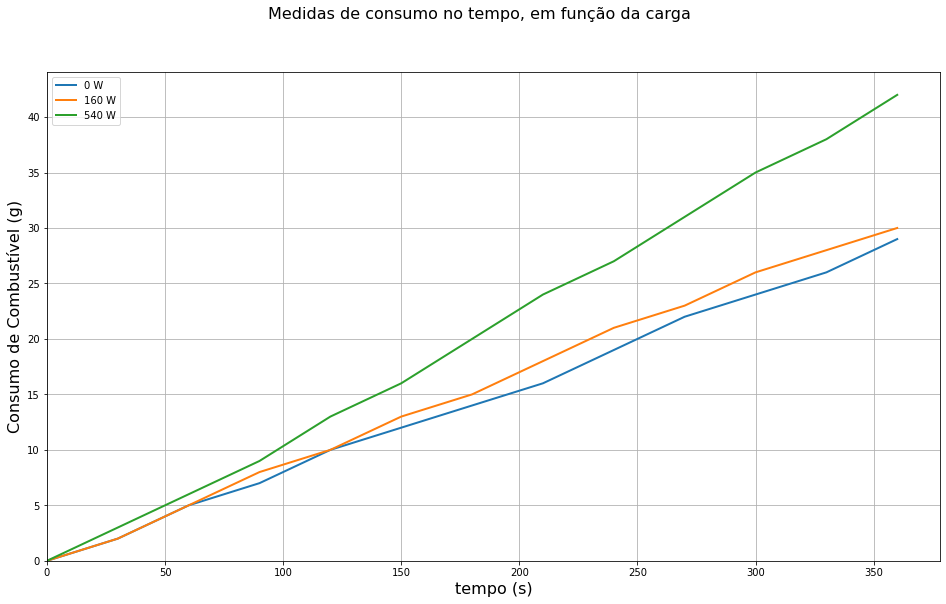

In [55]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Medidas de consumo no tempo, em função da carga', fontsize=16)
# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.set_ylabel('Consumo de Combustível (g)', fontsize=16)
ax.set_xlabel('tempo (s)', fontsize=16)

for key in df_dict:

        df = df_dict[key]

        ax.plot(df.tempo_s, df.massa_g, linewidth=2,label='{} W'.format(key))

ax.grid()
ax.legend()
ax.set_xlim(0)
ax.set_ylim(0)

plt.show()
fig.savefig('Figures/Consumo.png', bbox_inches='tight')
